In [111]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import cos, radians

In [157]:
# image size
img_size = 593
def count_craters(label_path: str):
    counts = np.zeros(img_size + 1, dtype=int)
    label_names = os.listdir(label_path)
    for label_name in label_names:
        label_file = open(label_path + '/' + label_name, 'r')
        labels = label_file.read().splitlines()
        lat = int(label_name.split('_')[0])
        for label in labels:
            w, h = label.split()[3: 5]
            w = int(float(w) * img_size * cos(radians(lat)))
            h = int(float(h) * img_size)
            d = int(max(w, h))
            counts[d] += 1
    return counts

def counts_to_interval_counts(counts):
    intervals = np.array([0, 5, 10, 15, 20, 30, 40, 50, 70, 100, 150, 200, 300, 400, 593])
    interval_counts = np.zeros(len(intervals), dtype=int)
    index = []
    for i in range(1, len(intervals)):
        l = intervals[i - 1] + 1
        r = intervals[i] + 1
        interval_counts[i] = sum(counts[l: r])
        index.append('%d ~ %d' % (l, r - 1))
    return index, interval_counts[1:]


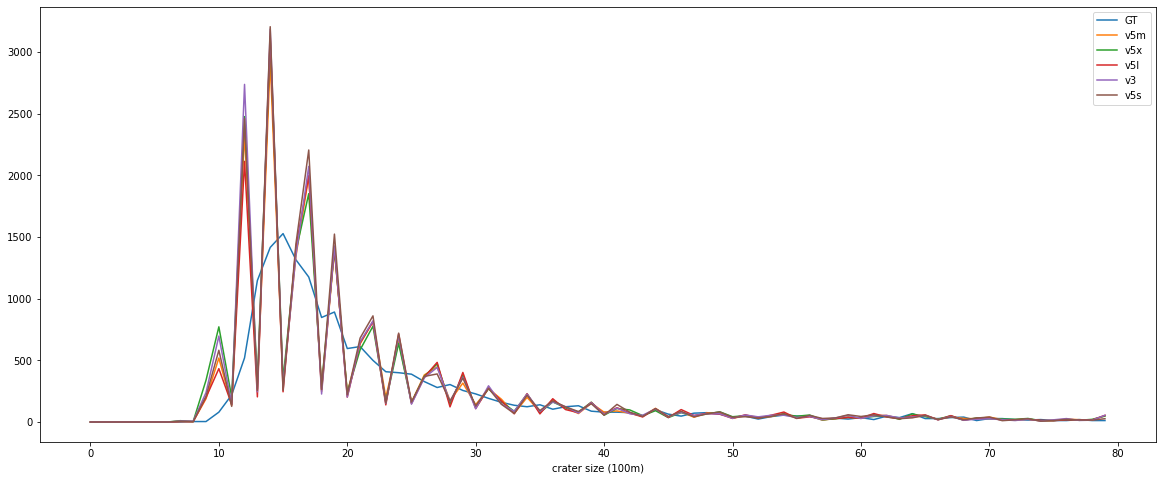

In [160]:
# ground truth
plt.figure(figsize=(20,8))

gt_counts = count_craters('dataset/labels')
plt.plot(gt_counts[: 80], label='GT')

intervals, intervals_counts = counts_to_interval_counts(gt_counts)
compare_table = pd.DataFrame()
compare_table['GT'] = intervals_counts
compare_table['index'] = intervals

# detection
runs = os.listdir('detect')
for run in runs:
    if 'v' not in run:
        continue
    counts = count_craters('detect/' + run + '/labels')
    plt.plot(counts[: 80], label=run)

    intervals, intervals_counts = counts_to_interval_counts(counts)
    compare_table[run] = intervals_counts

plt.xlabel('crater size (100m)')
plt.legend()
plt.show()
    

<AxesSubplot:xlabel='crater size (100m)'>

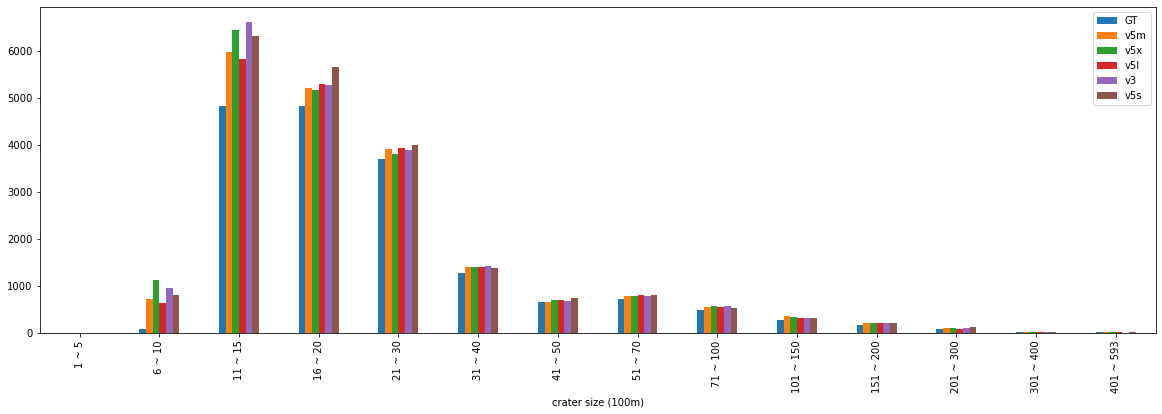

In [161]:
compare_table.plot(x='index', kind='bar', figsize=(20, 6), xlabel='crater size (100m)', sort_columns=True)

In [75]:
# # draw rectangles to deteted dataset
# import cv2
# import os
# from tqdm import tqdm
# import time

# img_size = 593
# f = lambda n, m : int((float(n) - m / 2) * img_size)

# label_path = 'dataset/labels'
# detect_path = 'detect'

# for run in os.listdir(detect_path):

#     run_path = detect_path + '/' + run
#     print('###### %s ######' % run)
#     time.sleep(0.5)
#     for img_name in tqdm(os.listdir(run_path)):
#         if 'png' not in img_name:
#             continue
#         img = cv2.imread(run_path + '/' + img_name)
#         label_file = open(label_path + '/' + img_name[:-4] + '.txt', 'r')
#         labels = label_file.read().splitlines()
#         for label in labels:
#             x, y, w, h = label.split()[1: 5]
#             w = float(w)
#             h = float(h)
#             x1 = f(x, w)
#             y1 = f(y, h)
#             x2 = f(x, -w)
#             y2 = f(y, -h)
#             cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         label_file.close()
#         cv2.imwrite(run_path + '/' + img_name, img)


###### v5m ######


100%|██████████| 4346/4346 [01:12<00:00, 60.21it/s]


###### v5x ######


100%|██████████| 4345/4345 [01:12<00:00, 59.59it/s]


###### v5l ######


100%|██████████| 4346/4346 [01:12<00:00, 60.26it/s]


###### v3 ######


100%|██████████| 4345/4345 [01:13<00:00, 58.73it/s]


###### v5s ######


100%|██████████| 4346/4346 [01:17<00:00, 55.75it/s]
